In [77]:
import pandas as pd
from prettytable import PrettyTable

# Load the Netflix CSV file into a DataFrame
netflix_csv_file_path = r'C:\Users\irmak\Desktop\cs210-termproj\NetflixViewingHistory.csv'
netflix_df = pd.read_csv(netflix_csv_file_path)

# Extract the date and duration from the 'Title' column
netflix_df[['Title', 'Date', 'Duration']] = netflix_df['Title'].str.extract(r'^(.*),"(\d+/\d+/\d+)"\;(\d+)$')

# Convert 'Date' to datetime format
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'], errors='coerce')

# Convert 'Duration' to numeric
netflix_df['Duration'] = pd.to_numeric(netflix_df['Duration'], errors='coerce')

# Filter data for the desired date range
netflix_start_date = pd.to_datetime('2022-07-02')
netflix_end_date = pd.to_datetime('2023-11-30')
filtered_netflix_df = netflix_df[(netflix_df['Date'] >= netflix_start_date) & (netflix_df['Date'] <= netflix_end_date)]

# Group by date and sum the 'Duration'
netflix_result_df = filtered_netflix_df.groupby('Date')['Duration'].sum().reset_index()

# Create a list with date and watch time
netflix_result_list = [{'Date': date.strftime('%m/%d/%y'), 'Total Duration (minutes)': duration} for date, duration in zip(netflix_result_df['Date'], netflix_result_df['Duration'])]

# Display the resulting list
print(netflix_result_list)


[{'Date': '07/05/22', 'Total Duration (minutes)': 50.0}, {'Date': '07/09/22', 'Total Duration (minutes)': 120.0}, {'Date': '07/14/22', 'Total Duration (minutes)': 50.0}, {'Date': '07/17/22', 'Total Duration (minutes)': 125.0}, {'Date': '07/19/22', 'Total Duration (minutes)': 120.0}, {'Date': '07/20/22', 'Total Duration (minutes)': 120.0}, {'Date': '07/31/22', 'Total Duration (minutes)': 225.0}, {'Date': '08/01/22', 'Total Duration (minutes)': 90.0}, {'Date': '08/04/22', 'Total Duration (minutes)': 135.0}, {'Date': '08/05/22', 'Total Duration (minutes)': 120.0}, {'Date': '08/06/22', 'Total Duration (minutes)': 120.0}, {'Date': '08/07/22', 'Total Duration (minutes)': 120.0}, {'Date': '08/08/22', 'Total Duration (minutes)': 120.0}, {'Date': '08/12/22', 'Total Duration (minutes)': 150.0}, {'Date': '08/13/22', 'Total Duration (minutes)': 250.0}, {'Date': '08/14/22', 'Total Duration (minutes)': 100.0}, {'Date': '08/17/22', 'Total Duration (minutes)': 240.0}, {'Date': '08/20/22', 'Total Durat

C:\Users\irmak\AppData\Local\Temp\ipykernel_8020\4208654627.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_df['Date'] = pd.to_datetime(netflix_df['Date'], errors='coerce')


In [78]:
pip install prettytable


Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd
from prettytable import PrettyTable

# Load the Netflix CSV file into a DataFrame
netflix_csv_file_path = r'C:\Users\irmak\Desktop\cs210-termproj\NetflixViewingHistory.csv'
netflix_df = pd.read_csv(netflix_csv_file_path)

# Extract the date and duration from the 'Title' column
netflix_df[['Title', 'Date', 'Duration']] = netflix_df['Title'].str.extract(r'^(.*),"(\d+/\d+/\d+)"\;(\d+)$')

# Convert 'Date' to datetime format with explicit date format
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'], format='%m/%d/%y', errors='coerce')

# Convert 'Duration' to numeric
netflix_df['Duration'] = pd.to_numeric(netflix_df['Duration'], errors='coerce')

# Filter data for the desired date range
netflix_start_date = pd.to_datetime('2022-07-02')
netflix_end_date = pd.to_datetime('2023-11-30')
filtered_netflix_df = netflix_df[(netflix_df['Date'] >= netflix_start_date) & (netflix_df['Date'] <= netflix_end_date)]

# Group by date and sum the 'Duration'
netflix_result_df = filtered_netflix_df.groupby('Date')['Duration'].sum().reset_index()

# Create a list of all dates within the range
date_range = pd.date_range(start=netflix_start_date, end=netflix_end_date)

# Merge with the result DataFrame to include days with 0 watch times
netflix_result_df = pd.DataFrame({'Date': date_range}).merge(netflix_result_df, on='Date', how='left').fillna(0)

# Display the result as a table
table = PrettyTable()
table.field_names = ['Date', 'Total Duration (minutes)']

for row in netflix_result_df.itertuples(index=False):
    table.add_row(row)

print(table)


+---------------------+--------------------------+
|         Date        | Total Duration (minutes) |
+---------------------+--------------------------+
| 2022-07-02 00:00:00 |           0.0            |
| 2022-07-03 00:00:00 |           0.0            |
| 2022-07-04 00:00:00 |           0.0            |
| 2022-07-05 00:00:00 |           50.0           |
| 2022-07-06 00:00:00 |           0.0            |
| 2022-07-07 00:00:00 |           0.0            |
| 2022-07-08 00:00:00 |           0.0            |
| 2022-07-09 00:00:00 |          120.0           |
| 2022-07-10 00:00:00 |           0.0            |
| 2022-07-11 00:00:00 |           0.0            |
| 2022-07-12 00:00:00 |           0.0            |
| 2022-07-13 00:00:00 |           0.0            |
| 2022-07-14 00:00:00 |           50.0           |
| 2022-07-15 00:00:00 |           0.0            |
| 2022-07-16 00:00:00 |           0.0            |
| 2022-07-17 00:00:00 |          125.0           |
| 2022-07-18 00:00:00 |        

In [80]:
pip install chardet


Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import chardet

# Function to detect encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Load the CSV file into a DataFrame with detected encoding
csv_file_path = r'C:\Users\irmak\Desktop\cs210-termproj\HealthSync_export_Samsung_Health_20220701_20231231.csv'
encoding = detect_encoding(csv_file_path)
df = pd.read_csv(csv_file_path, encoding=encoding)

# Display the first few rows of the DataFrame
print(df.head())


  Date;Time;Steps;Calories(kcal);Distance (metre);Speed;Aplication
0  1.Tem.22;03:00:00;6754;249;5336;1;com.sec.andr...              
1  2.Tem.22;03:00:00;664;23;524;1;com.sec.android...              
2  3.Tem.22;03:00:00;8428;309;6489;1;com.sec.andr...              
3  4.Tem.22;03:00:00;1716;60;1353;1;com.sec.andro...              
4  5.Tem.22;03:00:00;7514;258;5961;1;com.sec.andr...              


In [82]:
import pandas as pd
import chardet

# Function to detect encoding
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Load the CSV file into a DataFrame with detected encoding
csv_file_path = r'C:\Users\irmak\Desktop\cs210-termproj\HealthSync_export_Samsung_Health_20220701_20231231.csv'
encoding = detect_encoding(csv_file_path)
df = pd.read_csv(csv_file_path, encoding=encoding, delimiter=';')

# Manually create a new 'Date' column with specified dates using DataFrame length
date_range = pd.date_range(start='2022-07-02', periods=len(df))
df['Date'] = date_range

# Extract only the 'Date' and 'Steps' columns
result_df = df[['Date', 'Steps']]

# Display the resulting DataFrame
print(result_df.head())


        Date  Steps
0 2022-07-02   6754
1 2022-07-03    664
2 2022-07-04   8428
3 2022-07-05   1716
4 2022-07-06   7514


In [83]:
# Filter the DataFrame for dates up to 11-30-2023
filtered_df = df[df['Date'] <= '2023-11-30']

# Display the filtered DataFrame with only 'Date' and 'Steps' columns
display(filtered_df[['Date', 'Steps']])


,Date,Steps
0,2022-07-02,6754
1,2022-07-03,664
2,2022-07-04,8428
3,2022-07-05,1716
4,2022-07-06,7514
5,2022-07-07,3131
6,2022-07-08,12616
7,2022-07-09,9102
8,2022-07-10,8349
9,2022-07-11,3165


In [84]:
import pandas as pd
from datetime import datetime, timedelta

# Read the content of the text file
file_path = r"C:\Users\irmak\Desktop\cs210-termproj\res.txt"
with open(file_path, 'r') as file:
    content = file.read()

# Extract relevant information from the text file
cycles = content.split('---------------\n')[:-1]  # Split by cycle and remove the last empty element
cycle_info = [cycle.strip().split('\n') for cycle in cycles]

# Initialize an empty DataFrame
start_date = datetime(2022, 7, 2)
end_date = datetime(2023, 11, 30)
date_range = pd.date_range(start_date, end_date, freq='D')
df = pd.DataFrame(index=date_range, columns=['Menstrual Cycle Phases'])

# Format the index (dates) in the desired format
df.index = df.index.strftime('%d/%m/%Y')

# Print the DataFrame
print(df)


           Menstrual Cycle Phases
02/07/2022                    NaN
03/07/2022                    NaN
04/07/2022                    NaN
05/07/2022                    NaN
06/07/2022                    NaN
07/07/2022                    NaN
08/07/2022                    NaN
09/07/2022                    NaN
10/07/2022                    NaN
11/07/2022                    NaN
12/07/2022                    NaN
13/07/2022                    NaN
14/07/2022                    NaN
15/07/2022                    NaN
16/07/2022                    NaN
17/07/2022                    NaN
18/07/2022                    NaN
19/07/2022                    NaN
20/07/2022                    NaN
21/07/2022                    NaN
22/07/2022                    NaN
23/07/2022                    NaN
24/07/2022                    NaN
25/07/2022                    NaN
26/07/2022                    NaN
27/07/2022                    NaN
28/07/2022                    NaN
29/07/2022                    NaN
30/07/2022    

In [85]:
import pandas as pd
from datetime import datetime, timedelta

# Read the content of the text file
file_path = r"C:\Users\irmak\Desktop\cs210-termproj\res.txt"
with open(file_path, 'r') as file:
    content = file.read()

# Extract relevant information from the text file
cycles = content.split('---------------\n')[:-1]  # Split by cycle and remove the last empty element
cycle_info = [cycle.strip().split('\n') for cycle in cycles]

# Initialize an empty DataFrame
start_date = datetime(2022, 7, 2)
end_date = datetime(2023, 11, 30)
date_range = pd.date_range(start_date, end_date, freq='D')
df = pd.DataFrame(index=date_range, columns=['Menstrual Cycle Phases'])

# Format the index (dates) in the desired format
df.index = df.index.strftime('%d/%m/%Y')

# Mark the "Menstrual Cycle Phases" column based on the start and end dates
for cycle in cycle_info:
    start_date_str = cycle[1].split(': ')[1]
    end_date_str = cycle[2].split(': ')[1]
    
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d %H:%M:%S.%f')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d %H:%M:%S.%f')

    # Convert dates to strings
    start_date_str = start_date.strftime('%d/%m/%Y')
    end_date_str = end_date.strftime('%d/%m/%Y')

    # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "menstrual phase"
    df.loc[start_date_str:end_date_str, 'Menstrual Cycle Phases'] = 'menstrual phase'

# Print the DataFrame
print(df)


           Menstrual Cycle Phases
02/07/2022        menstrual phase
03/07/2022        menstrual phase
04/07/2022        menstrual phase
05/07/2022        menstrual phase
06/07/2022        menstrual phase
07/07/2022                    NaN
08/07/2022                    NaN
09/07/2022                    NaN
10/07/2022                    NaN
11/07/2022                    NaN
12/07/2022                    NaN
13/07/2022                    NaN
14/07/2022                    NaN
15/07/2022                    NaN
16/07/2022                    NaN
17/07/2022                    NaN
18/07/2022                    NaN
19/07/2022                    NaN
20/07/2022                    NaN
21/07/2022                    NaN
22/07/2022                    NaN
23/07/2022                    NaN
24/07/2022                    NaN
25/07/2022                    NaN
26/07/2022                    NaN
27/07/2022                    NaN
28/07/2022                    NaN
29/07/2022                    NaN
30/07/2022    

In [86]:
import pandas as pd
from datetime import datetime, timedelta

# Read the content of the text file
file_path = r"C:\Users\irmak\Desktop\cs210-termproj\res.txt"
with open(file_path, 'r') as file:
    content = file.read()

# Extract relevant information from the text file
cycles = content.split('---------------\n')[:-1]  # Split by cycle and remove the last empty element
cycle_info = [cycle.strip().split('\n') for cycle in cycles]

# Initialize an empty DataFrame
start_date = datetime(2022, 7, 2)
end_date = datetime(2023, 11, 30)
date_range = pd.date_range(start_date, end_date, freq='D')
df = pd.DataFrame(index=date_range, columns=['Menstrual Cycle Phases'])

# Format the index (dates) in the desired format
df.index = df.index.strftime('%d/%m/%Y')

# Mark the "Menstrual Cycle Phases" column based on the start and end dates
for cycle in cycle_info:
    start_date_str = cycle[1].split(': ')[1]
    end_date_str = cycle[2].split(': ')[1]
    
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d %H:%M:%S.%f')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d %H:%M:%S.%f')

    # Convert dates to strings
    start_date_str = start_date.strftime('%d/%m/%Y')
    end_date_str = end_date.strftime('%d/%m/%Y')

    # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "menstrual phase"
    df.loc[start_date_str:end_date_str, 'Menstrual Cycle Phases'] = 'menstrual phase'

# Set display options to show the entire DataFrame
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(df)


           Menstrual Cycle Phases
02/07/2022        menstrual phase
03/07/2022        menstrual phase
04/07/2022        menstrual phase
05/07/2022        menstrual phase
06/07/2022        menstrual phase
07/07/2022                    NaN
08/07/2022                    NaN
09/07/2022                    NaN
10/07/2022                    NaN
11/07/2022                    NaN
12/07/2022                    NaN
13/07/2022                    NaN
14/07/2022                    NaN
15/07/2022                    NaN
16/07/2022                    NaN
17/07/2022                    NaN
18/07/2022                    NaN
19/07/2022                    NaN
20/07/2022                    NaN
21/07/2022                    NaN
22/07/2022                    NaN
23/07/2022                    NaN
24/07/2022                    NaN
25/07/2022                    NaN
26/07/2022                    NaN
27/07/2022                    NaN
28/07/2022                    NaN
29/07/2022                    NaN
30/07/2022    

In [87]:
import pandas as pd
from datetime import datetime, timedelta

# Read the content of the text file
file_path = r"C:\Users\irmak\Desktop\cs210-termproj\res.txt"
with open(file_path, 'r') as file:
    content = file.read()

# Extract relevant information from the text file
cycles = content.split('---------------\n')[:-1]  # Split by cycle and remove the last empty element
cycle_info = [cycle.strip().split('\n') for cycle in cycles]

# Initialize an empty DataFrame
start_date = datetime(2022, 7, 2)
end_date = datetime(2023, 11, 30)
date_range = pd.date_range(start_date, end_date, freq='D')
df = pd.DataFrame(index=date_range, columns=['Menstrual Cycle Phases'])

# Format the index (dates) in the desired format
df.index = df.index.strftime('%d/%m/%Y')

# Mark the "Menstrual Cycle Phases" column based on the start and end dates
for cycle in cycle_info:
    start_date_str = cycle[1].split(': ')[1]
    end_date_str = cycle[2].split(': ')[1]
    
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d %H:%M:%S.%f')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d %H:%M:%S.%f')

    # Convert dates to strings
    start_date_str = start_date.strftime('%d/%m/%Y')
    end_date_str = end_date.strftime('%d/%m/%Y')

    # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "menstrual phase"
    df.loc[start_date_str:end_date_str, 'Menstrual Cycle Phases'] = 'menstrual phase'

    # Calculate the start and end dates of the follicular phase (add 9 days to the end of menstrual phase)
    follicular_start_date = end_date + timedelta(days=1)
    follicular_end_date = follicular_start_date + timedelta(days=9)

    # Convert dates to strings
    follicular_start_date_str = follicular_start_date.strftime('%d/%m/%Y')
    follicular_end_date_str = follicular_end_date.strftime('%d/%m/%Y')

    # Check if the dates exist in the DataFrame before setting values
    if follicular_start_date_str in df.index and follicular_end_date_str in df.index:
        # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "follicular phase"
        df.loc[follicular_start_date_str:follicular_end_date_str, 'Menstrual Cycle Phases'] = 'follicular phase'

# Set display options to show the entire DataFrame
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(df)


           Menstrual Cycle Phases
02/07/2022        menstrual phase
03/07/2022        menstrual phase
04/07/2022        menstrual phase
05/07/2022        menstrual phase
06/07/2022        menstrual phase
07/07/2022       follicular phase
08/07/2022       follicular phase
09/07/2022       follicular phase
10/07/2022       follicular phase
11/07/2022       follicular phase
12/07/2022       follicular phase
13/07/2022       follicular phase
14/07/2022       follicular phase
15/07/2022       follicular phase
16/07/2022       follicular phase
17/07/2022                    NaN
18/07/2022                    NaN
19/07/2022                    NaN
20/07/2022                    NaN
21/07/2022                    NaN
22/07/2022                    NaN
23/07/2022                    NaN
24/07/2022                    NaN
25/07/2022                    NaN
26/07/2022                    NaN
27/07/2022                    NaN
28/07/2022                    NaN
29/07/2022                    NaN
30/07/2022    

In [88]:
import pandas as pd
from datetime import datetime, timedelta

# Read the content of the text file
file_path = r"C:\Users\irmak\Desktop\cs210-termproj\res.txt"
with open(file_path, 'r') as file:
    content = file.read()

# Extract relevant information from the text file
cycles = content.split('---------------\n')[:-1]  # Split by cycle and remove the last empty element
cycle_info = [cycle.strip().split('\n') for cycle in cycles]

# Initialize an empty DataFrame
start_date = datetime(2022, 7, 2)
end_date = datetime(2023, 11, 30)
date_range = pd.date_range(start_date, end_date, freq='D')
df = pd.DataFrame(index=date_range, columns=['Menstrual Cycle Phases'])

# Format the index (dates) in the desired format
df.index = df.index.strftime('%d/%m/%Y')

# Mark the "Menstrual Cycle Phases" column based on the start and end dates
for cycle in cycle_info:
    start_date_str = cycle[1].split(': ')[1]
    end_date_str = cycle[2].split(': ')[1]
    
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d %H:%M:%S.%f')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d %H:%M:%S.%f')

    # Convert dates to strings
    start_date_str = start_date.strftime('%d/%m/%Y')
    end_date_str = end_date.strftime('%d/%m/%Y')

    # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "menstrual phase"
    df.loc[start_date_str:end_date_str, 'Menstrual Cycle Phases'] = 'menstrual phase'

    # Calculate the start and end dates of the follicular phase (add 9 days to the end of menstrual phase)
    follicular_start_date = end_date + timedelta(days=1)
    follicular_end_date = follicular_start_date + timedelta(days=9)

    # Convert dates to strings
    follicular_start_date_str = follicular_start_date.strftime('%d/%m/%Y')
    follicular_end_date_str = follicular_end_date.strftime('%d/%m/%Y')

    # Check if the dates exist in the DataFrame before setting values
    if follicular_start_date_str in df.index and follicular_end_date_str in df.index:
        # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "follicular phase"
        df.loc[follicular_start_date_str:follicular_end_date_str, 'Menstrual Cycle Phases'] = 'follicular phase'

        # Calculate the start and end dates of the ovulation phase (add 5 days to the end of follicular phase)
        ovulation_start_date = follicular_end_date + timedelta(days=1)
        ovulation_end_date = ovulation_start_date + timedelta(days=4)

        # Convert dates to strings
        ovulation_start_date_str = ovulation_start_date.strftime('%d/%m/%Y')
        ovulation_end_date_str = ovulation_end_date.strftime('%d/%m/%Y')

        # Check if the dates exist in the DataFrame before setting values
        if ovulation_start_date_str in df.index and ovulation_end_date_str in df.index:
            # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "ovulation phase"
            df.loc[ovulation_start_date_str:ovulation_end_date_str, 'Menstrual Cycle Phases'] = 'ovulation phase'

# Set display options to show the entire DataFrame
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(df)


           Menstrual Cycle Phases
02/07/2022        menstrual phase
03/07/2022        menstrual phase
04/07/2022        menstrual phase
05/07/2022        menstrual phase
06/07/2022        menstrual phase
07/07/2022       follicular phase
08/07/2022       follicular phase
09/07/2022       follicular phase
10/07/2022       follicular phase
11/07/2022       follicular phase
12/07/2022       follicular phase
13/07/2022       follicular phase
14/07/2022       follicular phase
15/07/2022       follicular phase
16/07/2022       follicular phase
17/07/2022        ovulation phase
18/07/2022        ovulation phase
19/07/2022        ovulation phase
20/07/2022        ovulation phase
21/07/2022        ovulation phase
22/07/2022                    NaN
23/07/2022                    NaN
24/07/2022                    NaN
25/07/2022                    NaN
26/07/2022                    NaN
27/07/2022                    NaN
28/07/2022                    NaN
29/07/2022                    NaN
30/07/2022    

In [89]:
import pandas as pd
from datetime import datetime, timedelta

# Read the content of the text file
file_path = r"C:\Users\irmak\Desktop\cs210-termproj\res.txt"
with open(file_path, 'r') as file:
    content = file.read()

# Extract relevant information from the text file
cycles = content.split('---------------\n')[:-1]  # Split by cycle and remove the last empty element
cycle_info = [cycle.strip().split('\n') for cycle in cycles]

# Initialize an empty DataFrame
start_date = datetime(2022, 7, 2)
end_date = datetime(2023, 11, 30)
date_range = pd.date_range(start_date, end_date, freq='D')
df = pd.DataFrame(index=date_range, columns=['Menstrual Cycle Phases'])

# Format the index (dates) in the desired format
df.index = df.index.strftime('%d/%m/%Y')

# Mark the "Menstrual Cycle Phases" column based on the start and end dates
for cycle in cycle_info:
    start_date_str = cycle[1].split(': ')[1]
    end_date_str = cycle[2].split(': ')[1]
    
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d %H:%M:%S.%f')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d %H:%M:%S.%f')

    # Convert dates to strings
    start_date_str = start_date.strftime('%d/%m/%Y')
    end_date_str = end_date.strftime('%d/%m/%Y')

    # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "menstrual phase"
    df.loc[start_date_str:end_date_str, 'Menstrual Cycle Phases'] = 'menstrual phase'

    # Calculate the start and end dates of the follicular phase (add 9 days to the end of menstrual phase)
    follicular_start_date = end_date + timedelta(days=1)
    follicular_end_date = follicular_start_date + timedelta(days=9)

    # Convert dates to strings
    follicular_start_date_str = follicular_start_date.strftime('%d/%m/%Y')
    follicular_end_date_str = follicular_end_date.strftime('%d/%m/%Y')

    # Check if the dates exist in the DataFrame before setting values
    if follicular_start_date_str in df.index and follicular_end_date_str in df.index:
        # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "follicular phase"
        df.loc[follicular_start_date_str:follicular_end_date_str, 'Menstrual Cycle Phases'] = 'follicular phase'

        # Calculate the start and end dates of the ovulation phase (add 5 days to the end of follicular phase)
        ovulation_start_date = follicular_end_date + timedelta(days=1)
        ovulation_end_date = ovulation_start_date + timedelta(days=4)

        # Convert dates to strings
        ovulation_start_date_str = ovulation_start_date.strftime('%d/%m/%Y')
        ovulation_end_date_str = ovulation_end_date.strftime('%d/%m/%Y')

        # Check if the dates exist in the DataFrame before setting values
        if ovulation_start_date_str in df.index and ovulation_end_date_str in df.index:
            # Mark the corresponding rows in the "Menstrual Cycle Phases" column as "ovulation phase"
            df.loc[ovulation_start_date_str:ovulation_end_date_str, 'Menstrual Cycle Phases'] = 'ovulation phase'

# Fill NaN values in the "Menstrual Cycle Phases" column with "luteal phase"
df['Menstrual Cycle Phases'].fillna('luteal phase', inplace=True)

# Set display options to show the entire DataFrame
pd.set_option('display.max_rows', None)

# Print the DataFrame
print(df)


           Menstrual Cycle Phases
02/07/2022        menstrual phase
03/07/2022        menstrual phase
04/07/2022        menstrual phase
05/07/2022        menstrual phase
06/07/2022        menstrual phase
07/07/2022       follicular phase
08/07/2022       follicular phase
09/07/2022       follicular phase
10/07/2022       follicular phase
11/07/2022       follicular phase
12/07/2022       follicular phase
13/07/2022       follicular phase
14/07/2022       follicular phase
15/07/2022       follicular phase
16/07/2022       follicular phase
17/07/2022        ovulation phase
18/07/2022        ovulation phase
19/07/2022        ovulation phase
20/07/2022        ovulation phase
21/07/2022        ovulation phase
22/07/2022           luteal phase
23/07/2022           luteal phase
24/07/2022           luteal phase
25/07/2022           luteal phase
26/07/2022           luteal phase
27/07/2022           luteal phase
28/07/2022           luteal phase
29/07/2022           luteal phase
30/07/2022    

In [90]:
import pandas as pd

# Assuming df contains 'Menstrual Cycle Phases' as index
df.index = pd.to_datetime(df.index, format='%d/%m/%Y')

# Assuming result_df contains 'Date' and 'Steps' columns

# Convert the 'Date' column to datetime format in result_df
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Merge the step count data with the menstrual cycle phases data
merged_df = df.merge(result_df, left_index=True, right_on='Date', how='left')


# Calculate average step counts for each phase
average_step_counts = merged_df.groupby('Menstrual Cycle Phases')['Steps'].mean()

# Print the average step counts
print("\nAverage Step Counts:")
print(average_step_counts)



Average Step Counts:
Menstrual Cycle Phases
follicular phase    6419.737500
luteal phase        6711.583333
menstrual phase     6511.905882
ovulation phase     5729.662500
Name: Steps, dtype: float64


In [91]:
import pandas as pd
from prettytable import PrettyTable

# Assuming df contains 'Menstrual Cycle Phases' as index
df.index = pd.to_datetime(df.index, format='%d/%m/%Y')

# Assuming netflix_df contains 'Date' and 'Duration' columns
                         
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'], errors='coerce')

# Merge the watch time data with the menstrual cycle phases data
merged_df = df.merge(netflix_df, left_index=True, right_on='Date', how='left')

# Calculate average watch time for each phase
average_watch_times = merged_df.groupby('Menstrual Cycle Phases')['Duration'].mean()

# Display the average watch times
print("\nAverage Watch Times:")
print(average_watch_times)



Average Watch Times:
Menstrual Cycle Phases
follicular phase    34.458613
luteal phase        33.719864
menstrual phase     36.202247
ovulation phase     39.664596
Name: Duration, dtype: float64


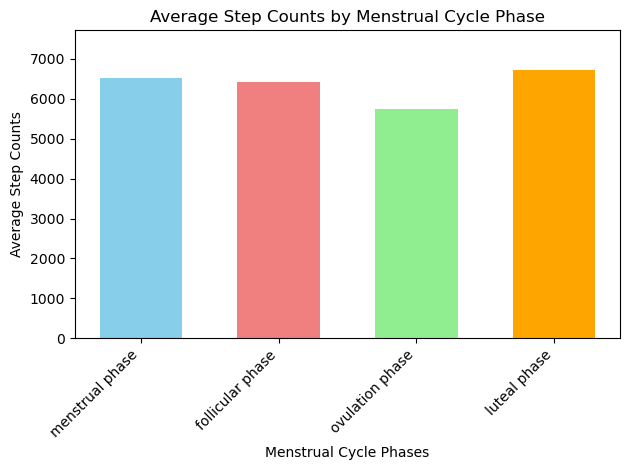

In [92]:
import matplotlib.pyplot as plt

# Assuming 'average_step_counts' is the calculated average step counts
custom_order = ['menstrual phase', 'follicular phase', 'ovulation phase', 'luteal phase']

# Reorder the average_step_counts based on the custom_order
ordered_counts = average_step_counts[custom_order]

plt.bar(ordered_counts.index, ordered_counts, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'], width=0.6)
plt.title('Average Step Counts by Menstrual Cycle Phase')
plt.xlabel('Menstrual Cycle Phases')
plt.ylabel('Average Step Counts')

# Adjust y-axis limits to make differences more prominent
plt.ylim(0, max(ordered_counts) + 1000)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


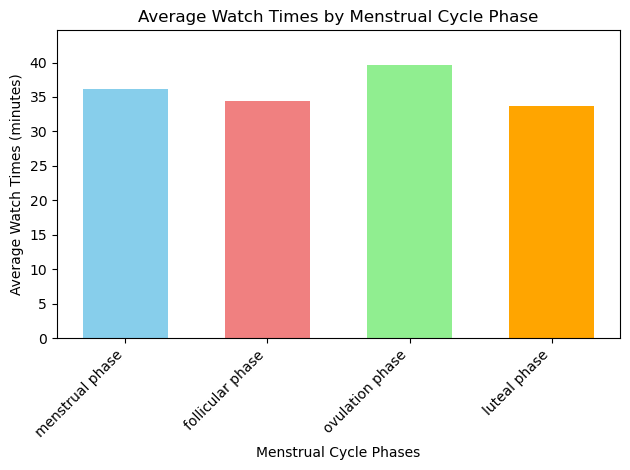

In [93]:
import matplotlib.pyplot as plt

# Assuming 'average_watch_times' is the calculated average watch times
custom_order = ['menstrual phase', 'follicular phase', 'ovulation phase', 'luteal phase']

# Reorder the average_watch_times based on the custom_order
ordered_watch_times = average_watch_times[custom_order]

plt.bar(ordered_watch_times.index, ordered_watch_times, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'], width=0.6)
plt.title('Average Watch Times by Menstrual Cycle Phase')
plt.xlabel('Menstrual Cycle Phases')
plt.ylabel('Average Watch Times (minutes)')

# Adjust y-axis limits to make differences more prominent
plt.ylim(0, max(ordered_watch_times) + 5)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better appearance
plt.show()


In [94]:
import pandas as pd

# Assuming df contains 'Menstrual Cycle Phases' as index
df.index = pd.to_datetime(df.index, format='%d/%m/%Y')

# Assuming result_df contains 'Date' and 'Steps' columns

# Convert the 'Date' column to datetime format in result_df
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Merge the step count data with the menstrual cycle phases data
merged_df = df.merge(result_df, left_index=True, right_on='Date', how='left')

# Add a new column 'Cycle Number' to identify each cycle
merged_df['Cycle Number'] = (merged_df['Menstrual Cycle Phases'] != merged_df['Menstrual Cycle Phases'].shift()).cumsum()

# Remove the last cycle
merged_df = merged_df[merged_df['Cycle Number'] != merged_df['Cycle Number'].max()]

# Calculate average step counts for each phase within each cycle
average_steps_by_cycle = merged_df.groupby(['Cycle Number', 'Menstrual Cycle Phases'])['Steps'].mean().reset_index()

# Group cycles into 16 categories
categories = ['menstrual', 'follicular', 'ovulation', 'luteal']
grouped_cycles = [list(range(i, i + 4)) for i in range(1, len(average_steps_by_cycle['Cycle Number'].unique()) + 1, 4)]

# Print the results for each grouped cycle
for group_num, cycles in enumerate(grouped_cycles, start=1):
    print(f"\nAverage steps for Cycle {group_num}:")

    for cycle_number in cycles:
        cycle_data = average_steps_by_cycle[average_steps_by_cycle['Cycle Number'] == cycle_number]
        print(f"\nAverage steps for Phase {cycle_number}:")

        for row in cycle_data.itertuples(index=False):
            phase_name = row[1].replace(' phase', '')  # Remove 'phase' from the phase name
            print(f"{phase_name}: {row[2]}")



Average steps for Cycle 1:

Average steps for Phase 1:
menstrual: 5015.2

Average steps for Phase 2:
follicular: 9031.8

Average steps for Phase 3:
ovulation: 5552.4

Average steps for Phase 4:
luteal: 6661.833333333333

Average steps for Cycle 2:

Average steps for Phase 5:
menstrual: 2470.4

Average steps for Phase 6:
follicular: 4313.2

Average steps for Phase 7:
ovulation: 6636.8

Average steps for Phase 8:
luteal: 6802.090909090909

Average steps for Cycle 3:

Average steps for Phase 9:
menstrual: 6256.0

Average steps for Phase 10:
follicular: 6204.9

Average steps for Phase 11:
ovulation: 4455.6

Average steps for Phase 12:
luteal: 7193.076923076923

Average steps for Cycle 4:

Average steps for Phase 13:
menstrual: 6013.8

Average steps for Phase 14:
follicular: 5156.7

Average steps for Phase 15:
ovulation: 7656.4

Average steps for Phase 16:
luteal: 7552.1875

Average steps for Cycle 5:

Average steps for Phase 17:
menstrual: 6392.8

Average steps for Phase 18:
follicular: 6

In [95]:
import pandas as pd
import numpy as np

# Create an empty DataFrame
matrix_df = pd.DataFrame(np.empty((16, 4), dtype=float), columns=['menstrual', 'follicular', 'ovulation', 'luteal'])

# Define cycle names
cycle_names = [f'Cycle {i}' for i in range(1, 17)]

# Set cycle names as index
matrix_df.index = cycle_names

# Iterate through the grouped cycles and populate the DataFrame
for group_num, cycles in enumerate(grouped_cycles, start=1):
    for cycle_number in cycles:
        cycle_data = average_steps_by_cycle[average_steps_by_cycle['Cycle Number'] == cycle_number]
        for row in cycle_data.itertuples(index=False):
            phase_name = row[1].replace(' phase', '')
            matrix_df.at[cycle_names[group_num - 1], phase_name] = round(row[2], 1)

# Print the DataFrame
print(matrix_df)


          menstrual  follicular  ovulation   luteal
Cycle 1      5015.2      9031.8     5552.4   6661.8
Cycle 2      2470.4      4313.2     6636.8   6802.1
Cycle 3      6256.0      6204.9     4455.6   7193.1
Cycle 4      6013.8      5156.7     7656.4   7552.2
Cycle 5      6392.8      6542.0     6580.8   8455.5
Cycle 6      7566.8      6490.8     4986.0   5277.5
Cycle 7      6287.0      8366.6     5696.4   6390.2
Cycle 8      9624.0     10029.9     5987.4  10628.9
Cycle 9      8172.6      5701.6     2852.6   3154.9
Cycle 10     3119.6      2817.0     4658.0   5880.3
Cycle 11     5797.0      3400.9     3726.8   6301.8
Cycle 12     6376.8      7442.4     5574.2   7159.4
Cycle 13     5973.4      4146.8     8535.4   5360.4
Cycle 14     6867.4      5742.1     5128.8   5673.4
Cycle 15     9195.2      8020.1     6965.8   7634.3
Cycle 16     6641.2      9309.0     6681.2   7969.2


In [96]:
# Create an empty DataFrame for the rank table
rank_table = pd.DataFrame(index=cycle_names, columns=['menstrual', 'follicular', 'ovulation', 'luteal'], dtype=int)

# Iterate through the cycles and assign ranks to each phase independently within each cycle
for cycle in cycle_names:
    for phase in matrix_df.columns:
        rank_table.at[cycle, phase] = (matrix_df.loc[cycle, phase] < matrix_df.loc[cycle, :]).sum() + 1

# Print the corrected rank table
print(rank_table)


          menstrual  follicular  ovulation  luteal
Cycle 1         4.0         1.0        3.0     2.0
Cycle 2         4.0         3.0        2.0     1.0
Cycle 3         2.0         3.0        4.0     1.0
Cycle 4         3.0         4.0        1.0     2.0
Cycle 5         4.0         3.0        2.0     1.0
Cycle 6         1.0         2.0        4.0     3.0
Cycle 7         3.0         1.0        4.0     2.0
Cycle 8         3.0         2.0        4.0     1.0
Cycle 9         1.0         2.0        4.0     3.0
Cycle 10        3.0         4.0        2.0     1.0
Cycle 11        2.0         4.0        3.0     1.0
Cycle 12        3.0         1.0        4.0     2.0
Cycle 13        2.0         4.0        1.0     3.0
Cycle 14        1.0         2.0        4.0     3.0
Cycle 15        1.0         2.0        4.0     3.0
Cycle 16        4.0         1.0        3.0     2.0


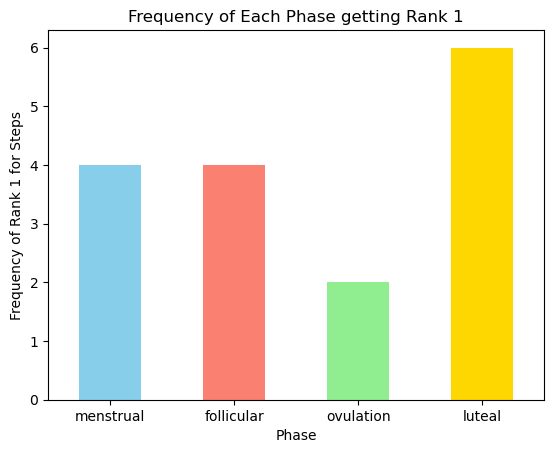

In [97]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'menstrual' column for all cycles
rank_1_counts = rank_table.apply(lambda x: x.value_counts().sort_index().get(1, 0))

# Define the x-axis labels
labels = ['menstrual', 'follicular', 'ovulation', 'luteal']

# Define custom colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']

# Plot the bar chart with custom colors
rank_1_counts.plot(kind='bar', color=colors)
plt.xlabel('Phase')
plt.ylabel('Frequency of Rank 1 for Steps')
plt.title('Frequency of Each Phase getting Rank 1')
plt.xticks(range(len(labels)), labels, rotation=0)
plt.show()


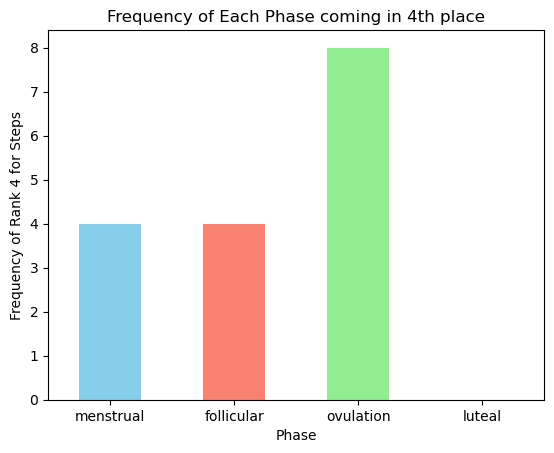

In [98]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'luteal' column for all cycles
rank_4_counts = rank_table.apply(lambda x: x.value_counts().sort_index().get(4, 0))

# Define the x-axis labels
labels = ['menstrual', 'follicular', 'ovulation', 'luteal']

# Define custom colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']

# Plot the bar chart with custom colors
rank_4_counts.plot(kind='bar', color=colors)
plt.xlabel('Phase')
plt.ylabel('Frequency of Rank 4 for Steps')
plt.title('Frequency of Each Phase coming in 4th place')
plt.xticks(range(len(labels)), labels, rotation=0)
plt.show()


In [99]:
import pandas as pd

# Assuming netflix_df contains 'Date' and 'Duration' columns

netflix_df['Date'] = pd.to_datetime(netflix_df['Date'], errors='coerce')

# Merge the watch time data with the menstrual cycle phases data
merged_df = df.merge(netflix_df, left_index=True, right_on='Date', how='left')

# Add a new column 'Cycle Number' to identify each cycle
merged_df['Cycle Number'] = (merged_df['Menstrual Cycle Phases'] != merged_df['Menstrual Cycle Phases'].shift()).cumsum()

# Remove the last cycle
merged_df = merged_df[merged_df['Cycle Number'] != merged_df['Cycle Number'].max()]

# Calculate average watch time for each phase within each cycle
average_watch_by_cycle = merged_df.groupby(['Cycle Number', 'Menstrual Cycle Phases'])['Duration'].mean().reset_index()

# Group cycles into 16 categories
categories = ['menstrual', 'follicular', 'ovulation', 'luteal']
grouped_cycles = [list(range(i, i + 4)) for i in range(1, len(average_watch_by_cycle['Cycle Number'].unique()) + 1, 4)]

# Print the results for each grouped cycle
for group_num, cycles in enumerate(grouped_cycles, start=1):
    print(f"\nAverage watch time for Cycle {group_num}:")

    for cycle_number in cycles:
        cycle_data = average_watch_by_cycle[average_watch_by_cycle['Cycle Number'] == cycle_number]
        print(f"\nAverage watch time for Phase {cycle_number}:")

        for row in cycle_data.itertuples(index=False):
            phase_name = row[1].replace(' phase', '')  # Remove 'phase' from the phase name
            print(f"{phase_name}: {row[2]}")



Average watch time for Cycle 1:

Average watch time for Phase 1:
menstrual: 50.0

Average watch time for Phase 2:
follicular: 85.0

Average watch time for Phase 3:
ovulation: 91.25

Average watch time for Phase 4:
luteal: 45.0

Average watch time for Cycle 2:

Average watch time for Phase 5:
menstrual: 82.5

Average watch time for Phase 6:
follicular: 66.15384615384616

Average watch time for Phase 7:
ovulation: 40.0

Average watch time for Phase 8:
luteal: 30.263157894736842

Average watch time for Cycle 3:

Average watch time for Phase 9:
menstrual: nan

Average watch time for Phase 10:
follicular: 38.18181818181818

Average watch time for Phase 11:
ovulation: 50.0

Average watch time for Phase 12:
luteal: 30.833333333333332

Average watch time for Cycle 4:

Average watch time for Phase 13:
menstrual: 67.5

Average watch time for Phase 14:
follicular: 41.666666666666664

Average watch time for Phase 15:
ovulation: 82.5

Average watch time for Phase 16:
luteal: 53.42857142857143

Ave

In [100]:
import pandas as pd
import numpy as np

# Create an empty DataFrame for the matrix
matrix_df2 = pd.DataFrame(np.empty((16, 4), dtype=float), columns=['menstrual', 'follicular', 'ovulation', 'luteal'])

# Define cycle names
cycle_names = [f'Cycle {i}' for i in range(1, 17)]

# Set cycle names as index
matrix_df2.index = cycle_names

# Iterate through the cycles and populate the DataFrame
for group_num, cycles in enumerate(grouped_cycles, start=1):
    for cycle_number in cycles:
        cycle_data = average_watch_by_cycle[average_watch_by_cycle['Cycle Number'] == cycle_number]
        for row in cycle_data.itertuples(index=False):
            phase_name = row[1].replace(' phase', '')
            value = round(row[2], 1)
            if pd.notna(value):  # Check if the value is not NaN
                matrix_df2.at[cycle_names[group_num - 1], phase_name] = value
            else:
                matrix_df2.at[cycle_names[group_num - 1], phase_name] = 0

# Print the DataFrame
print(matrix_df2)


          menstrual  follicular  ovulation  luteal
Cycle 1        50.0        85.0       91.2    45.0
Cycle 2        82.5        66.2       40.0    30.3
Cycle 3         0.0        38.2       50.0    30.8
Cycle 4        67.5        41.7       82.5    53.4
Cycle 5        15.0        52.5       50.8    48.0
Cycle 6        70.0        82.0       75.0    30.0
Cycle 7        30.4        23.0       45.2    61.9
Cycle 8        32.9        23.3       50.0    26.4
Cycle 9        50.0        61.7       27.5    32.4
Cycle 10       40.0        49.2       60.0    50.0
Cycle 11       48.5        20.9       22.5    24.3
Cycle 12       28.2        43.1       51.8    58.9
Cycle 13       58.2        52.5       47.0    33.6
Cycle 14       40.0        42.4       42.4    27.2
Cycle 15       30.9        22.1       22.0    28.2
Cycle 16       23.4        31.0       30.0    33.8


In [101]:
# Create an empty DataFrame for the rank table
rank_table2 = pd.DataFrame(index=cycle_names, columns=['menstrual', 'follicular', 'ovulation', 'luteal'], dtype=int)

# Iterate through the cycles and assign ranks to each phase independently within each cycle
for cycle in cycle_names:
    for phase in matrix_df2.columns:
        rank_table2.at[cycle, phase] = (matrix_df2.loc[cycle, phase] < matrix_df2.loc[cycle, :]).sum() + 1

# Replace NaN values with 0
rank_table2 = rank_table2.fillna(0).astype(int)

# Print the corrected rank table
print(rank_table2)


          menstrual  follicular  ovulation  luteal
Cycle 1           3           2          1       4
Cycle 2           1           2          3       4
Cycle 3           4           2          1       3
Cycle 4           2           4          1       3
Cycle 5           4           1          2       3
Cycle 6           3           1          2       4
Cycle 7           3           4          2       1
Cycle 8           2           4          1       3
Cycle 9           2           1          4       3
Cycle 10          4           3          1       2
Cycle 11          1           4          3       2
Cycle 12          4           3          2       1
Cycle 13          1           2          3       4
Cycle 14          3           1          1       4
Cycle 15          1           3          4       2
Cycle 16          4           2          3       1


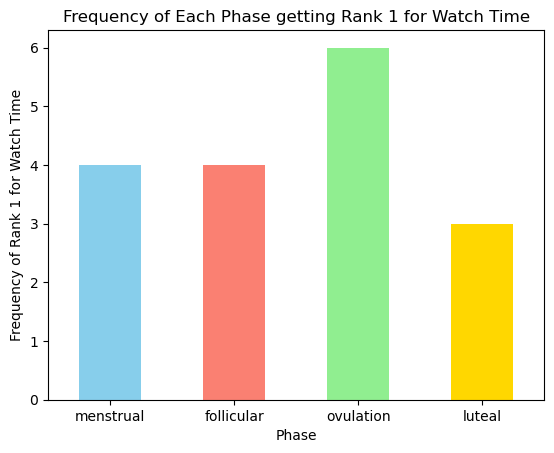

In [102]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'menstrual' column for all cycles in the rank table
watch_time_rank_1_counts = rank_table2.apply(lambda x: x.value_counts().sort_index().get(1, 0))

# Define the x-axis labels
labels = ['menstrual', 'follicular', 'ovulation', 'luteal']

# Define custom colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']

# Plot the bar chart with custom colors
watch_time_rank_1_counts.plot(kind='bar', color=colors)
plt.xlabel('Phase')
plt.ylabel('Frequency of Rank 1 for Watch Time')
plt.title('Frequency of Each Phase getting Rank 1 for Watch Time')
plt.xticks(range(len(labels)), labels, rotation=0)
plt.show()


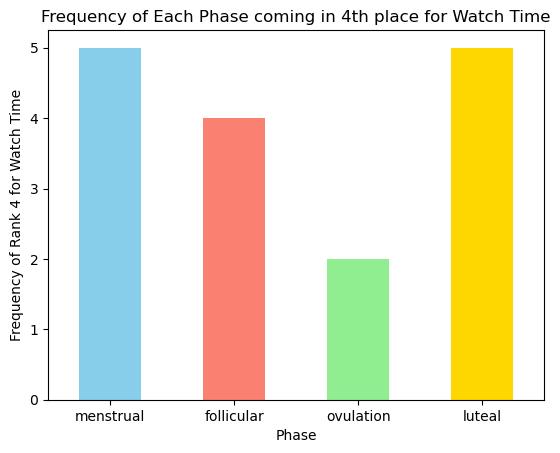

In [103]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'luteal' column for all cycles in the rank table
watch_time_rank_4_counts = rank_table2.apply(lambda x: x.value_counts().sort_index().get(4, 0))

# Define the x-axis labels
labels = ['menstrual', 'follicular', 'ovulation', 'luteal']

# Define custom colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']

# Plot the bar chart with custom colors
watch_time_rank_4_counts.plot(kind='bar', color=colors)
plt.xlabel('Phase')
plt.ylabel('Frequency of Rank 4 for Watch Time')
plt.title('Frequency of Each Phase coming in 4th place for Watch Time')
plt.xticks(range(len(labels)), labels, rotation=0)
plt.show()


In [104]:

# Calculate Correlation Coefficients for Steps
steps_correlation_matrix = matrix_df.corr()
steps_rank_correlation_matrix = rank_table.corr()

# Calculate Correlation Coefficients for Watch Time
watch_time_correlation_matrix = matrix_df2.corr()
watch_time_rank_correlation_matrix = rank_table2.corr()

# Print the correlation matrices
print("Correlation Matrix for Steps:")
print(steps_correlation_matrix)

print("\nRank Correlation Matrix for Steps:")
print(steps_rank_correlation_matrix)

print("\nCorrelation Matrix for Watch Time:")
print(watch_time_correlation_matrix)

print("\nRank Correlation Matrix for Watch Time:")
print(watch_time_rank_correlation_matrix)


Correlation Matrix for Steps:
            menstrual  follicular  ovulation    luteal
menstrual    1.000000    0.578882  -0.051479  0.217399
follicular   0.578882    1.000000   0.147799  0.531144
ovulation   -0.051479    0.147799   1.000000  0.438733
luteal       0.217399    0.531144   0.438733  1.000000

Rank Correlation Matrix for Steps:
            menstrual  follicular  ovulation    luteal
menstrual    1.000000   -0.097179  -0.440660 -0.639091
follicular  -0.097179    1.000000  -0.691547 -0.308964
ovulation   -0.440660   -0.691547   1.000000  0.212792
luteal      -0.639091   -0.308964   0.212792  1.000000

Correlation Matrix for Watch Time:
            menstrual  follicular  ovulation    luteal
menstrual    1.000000    0.508688   0.266733 -0.133724
follicular   0.508688    1.000000   0.591257  0.037075
ovulation    0.266733    0.591257   1.000000  0.446231
luteal      -0.133724    0.037075   0.446231  1.000000

Rank Correlation Matrix for Watch Time:
            menstrual  follicula

In [105]:
from scipy.stats import f_oneway

# ANOVA for Steps
steps_anova = f_oneway(matrix_df['menstrual'], matrix_df['follicular'], matrix_df['ovulation'], matrix_df['luteal'])
print("ANOVA for Steps:")
print(steps_anova)


ANOVA for Steps:
F_onewayResult(statistic=0.9077312206486456, pvalue=0.4427546877892302)


In [106]:
# ANOVA for Watch Time
watch_anova = f_oneway(matrix_df2['menstrual'], matrix_df2['follicular'], matrix_df2['ovulation'], matrix_df2['luteal'])
print("\nANOVA for Watch Time:")
print(watch_anova)



ANOVA for Watch Time:
F_onewayResult(statistic=1.0113271791622012, pvalue=0.39407416145597723)
